# Airbnb New York City

## Import data from Github

In [9]:
import pandas as pd
airbnb_price_url = 'https://raw.githubusercontent.com/EbGazar/Exploring-NYC-Airbnb-Market/main/Datasets/airbnb_price.csv'
airbnb_last_review_url = 'https://raw.githubusercontent.com/EbGazar/Exploring-NYC-Airbnb-Market/main/Datasets/airbnb_last_review.tsv'

# Read the CSV file into a pandas DataFrame
airbnb_price_df = pd.read_csv(airbnb_price_url)
airbnb_last_review_df = pd.read_csv(airbnb_last_review_url, delimiter='\t')
airbnb_room_type_df = pd.read_excel('airbnb_room_type.xlsx')

# Merge DataFrames based on 'listing_id'
combined_data = pd.merge(airbnb_price_df, airbnb_last_review_df, on='listing_id', how='outer')
combined_data = pd.merge(combined_data, airbnb_room_type_df, on='listing_id', how='outer')

# Save the combined data to an Excel file
combined_data.to_excel('merged_file.xlsx', index=False)


In [10]:
combined_data

,listing_id,price,nbhood_full,host_name,last_review,description,room_type
0,2595,225 dollars,"Manhattan, Midtown",Jennifer,May 21 2019,Skylit Midtown Castle,Entire home/apt
1,3831,89 dollars,"Brooklyn, Clinton Hill",LisaRoxanne,July 05 2019,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,200 dollars,"Manhattan, Murray Hill",Chris,June 22 2019,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Shunichi,June 24 2019,Large Furnished Room Near B'way,private room
4,5238,150 dollars,"Manhattan, Chinatown",Ben,June 09 2019,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt
...,...,...,...,...,...,...,...
25204,36425863,129 dollars,"Manhattan, Upper East Side",Rusaa,July 07 2019,Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM
25205,36427429,45 dollars,"Queens, Flushing",H Ai,July 07 2019,No.2 with queen size bed,PRIVATE ROOM
25206,36438336,235 dollars,"Staten Island, Great Kills",Ben,July 07 2019,Seas The Moment,Private room
25207,36442252,100 dollars,"Bronx, Mott Haven",Blaine,July 07 2019,1B-1B apartment near by Metro,Entire home/apt


## Clean the price column by change the datatype

In [11]:
combined_data['price'].dtype

dtype('O')

In [12]:
# change it from string to float
combined_data['price'] = combined_data['price'].str.replace(' dollars', '').astype(float)

In [13]:
combined_data['price'].dtype

dtype('float64')

## Calulate the average price

In [15]:
average_price = combined_data['price'].mean()
average_price

141.7779364512674

In [16]:
combined_data['price'].describe()

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64

## Average Price by Neighborhood

In [30]:
avg_price_by_neighborhood = combined_data.groupby('nbhood_full')['price'].mean().sort_values(ascending = False)
avg_price_by_neighborhood.head(10)

nbhood_full
Brooklyn, Sea Gate              805.000000
Manhattan, Tribeca              396.704918
Manhattan, Flatiron District    342.055556
Manhattan, NoHo                 335.024390
Manhattan, SoHo                 299.162304
Queens, Neponsit                274.666667
Manhattan, Midtown              272.213816
Manhattan, West Village         258.762570
Staten Island, Willowbrook      249.000000
Manhattan, Murray Hill          240.367021
Name: price, dtype: float64

## Clean the room_type column

In [34]:
# Clean and standardize the 'room_type' column
combined_data['room_type'] = combined_data['room_type'].str.lower().str.strip()
combined_data['room_type']

0        entire home/apt
1        entire home/apt
2        entire home/apt
3           private room
4        entire home/apt
              ...       
25204       private room
25205       private room
25206       private room
25207    entire home/apt
25208       private room
Name: room_type, Length: 25209, dtype: object

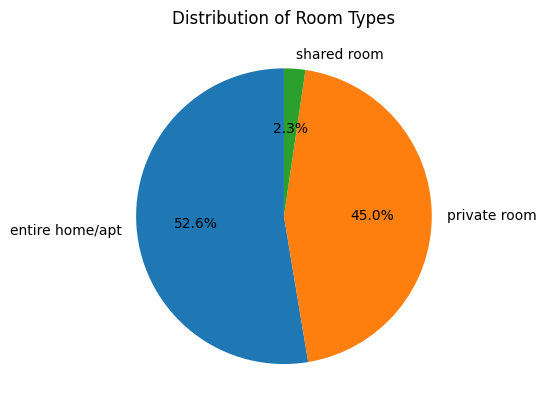

In [36]:
import matplotlib.pyplot as plt

# Plot the pie chart
room_type_counts = combined_data['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Room Types')
plt.show()

## Average Price by Room Type

In [37]:
avg_price_by_room_type = combined_data.groupby('room_type')['price'].mean().sort_values(ascending = False)
avg_price_by_room_type.head(10)

room_type
entire home/apt    197.166667
private room        81.638165
shared room         53.465077
Name: price, dtype: float64

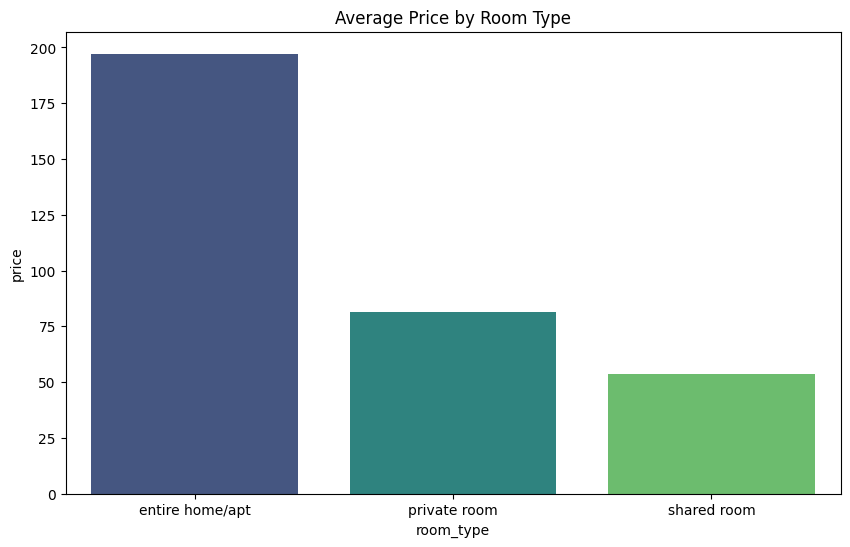

In [42]:
import seaborn as sns
# Calculate the average price for each room type
avg_price_by_room_type = combined_data.groupby('room_type')['price'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', hue='room_type', data=avg_price_by_room_type, palette='viridis', legend=False)
plt.title('Average Price by Room Type')
plt.show()